In this notebook, I plot all the 16 parameters of the forst two degree of vector spherical harmonics.

The plot is made by modifying the demo given in [matplotlib gallery](https://matplotlib.org/examples/images_contours_and_fields/streamplot_demo_features.html).

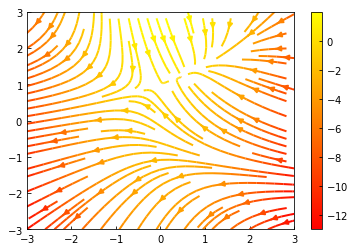

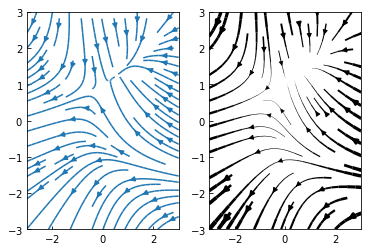

In [13]:
"""
Demo of the `streamplot` function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = "svg"

Y, X = np.mgrid[-3:3:200j, -3:3:200j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

Generate the grid of right ascension and declination.

In [45]:
pi = np.pi
cos, sin =np.cos, np.sin

dec_deg, ra_deg = np.mgrid[-90:90:180j, 0:360:360j]
dec_rad, ra_rad = np.mgrid[-pi/2:pi/2:180j, 0:2*pi:360j]

ra_deg1 = np.arange(0, 360, 1)
dec_deg1 = np.arange(-90, 90, 1)

# cos(dec) factor
fac = cos(dec_rad)

For the first order, the rotation component is consistent of three component $R = (R_1, R_2, R_3)^{\rm T}$. 

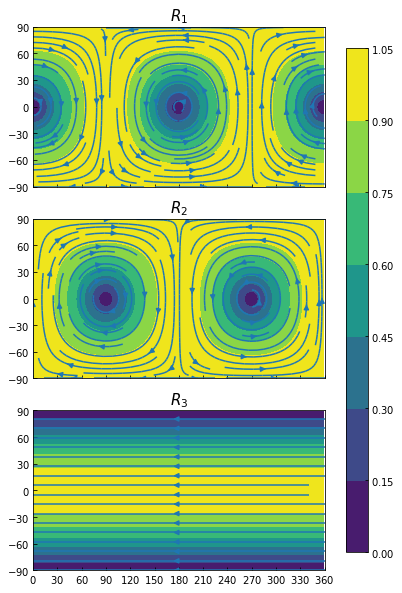

In [104]:
R1, R2, R3 = 1, 1, 1

# R1
drac1 = R1 * cos(ra_rad) * sin(dec_rad)
dra1 = drac1 / fac
ddec1 = -R1 * sin(ra_rad)
dpos1 = np.sqrt(drac1*drac1 + ddec1*ddec1)

# R2
drac2 = R2 * sin(ra_rad) * sin(dec_rad) 
dra2 = drac2 / fac
ddec2 = R2 * cos(ra_rad)
dpos2 = np.sqrt(drac2*drac2 + ddec2*ddec2)

# R3
drac3 = -R3 * cos(dec_rad)
dra3 = drac3 / fac
ddec3 = np.zeros_like(ra_rad)
dpos3 = np.sqrt(drac3*drac3 + ddec3*ddec3)


fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 10), nrows=3, 
                                    sharex=True, sharey=True)

ax0.streamplot(ra_deg, dec_deg, dra1, ddec1)
ax1.streamplot(ra_deg, dec_deg, dra2, ddec2)
ax2.streamplot(ra_deg, dec_deg, dra3, ddec3, density=0.6)

cs0 = ax0.contourf(ra_deg1, dec_deg1, dpos1, vmin=0, vmax=1)
cs1 = ax1.contourf(ra_deg1, dec_deg1, dpos2, vmin=0, vmax=1)
cs2 = ax2.contourf(ra_deg1, dec_deg1, dpos3, vmin=0, vmax=1)


ax0.axis([0, 360, -90, 90])
ax0.set_xticks(np.arange(0, 361, 30))
ax0.set_yticks(np.arange(-90, 91, 30))

ax0.set_title("$R_1$", fontsize=15)
ax1.set_title("$R_2$", fontsize=15)
ax2.set_title("$R_3$", fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs0, cax=cbar_ax)

For the first order, the rotation component is consistent of three component $D = (D_1, D_2, D_3)^{\rm T}$. 

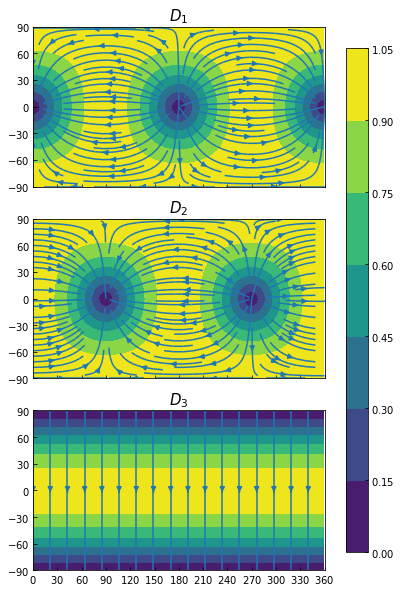

In [105]:
D1, D2, D3 = 1, 1, 1

# D1
drac1 = -R1 * sin(ra_rad)
ddec1 = -R1 * cos(ra_rad) * sin(dec_rad)
dra1 = drac1 / fac
dpos1 = np.sqrt(drac1*drac1 + ddec1*ddec1)

# R2
drac2 = R2 * cos(ra_rad)
ddec2 = -R2 * sin(ra_rad) * sin(dec_rad) 
dra2 = drac2 / fac
dpos2 = np.sqrt(drac2*drac2 + ddec2*ddec2)

# R3
drac3 = np.zeros_like(ra_rad)
ddec3 = -R3 * cos(dec_rad)
dra3 = drac3 / fac
dpos3 = np.sqrt(drac3*drac3 + ddec3*ddec3)


fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 10), nrows=3, 
                                    sharex=True, sharey=True)

ax0.streamplot(ra_deg, dec_deg, dra1, ddec1)
ax1.streamplot(ra_deg, dec_deg, dra2, ddec2)
ax2.streamplot(ra_deg, dec_deg, dra3, ddec3, density=0.6)

cs0 = ax0.contourf(ra_deg1, dec_deg1, dpos1, vmin=0, vmax=1)
cs1 = ax1.contourf(ra_deg1, dec_deg1, dpos2, vmin=0, vmax=1)
cs2 = ax2.contourf(ra_deg1, dec_deg1, dpos3, vmin=0, vmax=1)

ax0.axis([0, 360, -90, 90])
ax0.set_xticks(np.arange(0, 361, 30))
ax0.set_yticks(np.arange(-90, 91, 30))

ax0.set_title("$D_1$", fontsize=15)
ax1.set_title("$D_2$", fontsize=15)
ax2.set_title("$D_3$", fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs0, cax=cbar_ax)

For the second degree, there are two component: $E$ terms and $M$ terms.

The $E$ terms contains: $E_{20}$, $E_{21}^R$, $E_{21}^I$, $E_{22}^R$, $E_{22}^I$.
The $M$ terms contains: $M_{20}$, $M_{21}^R$, $M_{21}^I$, $M_{22}^R$, $M_{22}^I$.

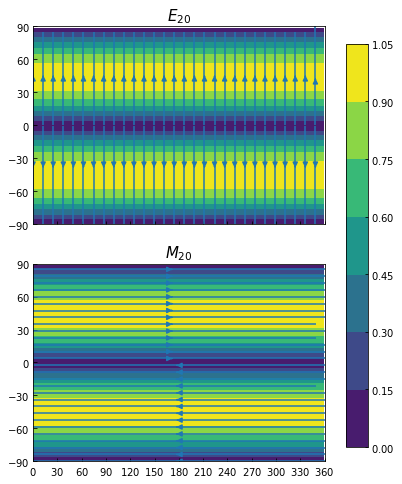

In [107]:
E20, M20 = 1, 1

# E_20
drac1 = np.zeros_like(ra_rad)
ddec1 = E20 * sin(2 * dec_rad)
dra1 = drac1 / fac
dpos1 = np.sqrt(drac1*drac1 + ddec1*ddec1)

# M20
drac2 = M20 * sin(2 * dec_rad)
ddec2 = np.zeros_like(ra_rad)
dra2 = drac2 / fac
dpos2 = np.sqrt(drac2*drac2 + ddec2*ddec2)

fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, 
                                    sharex=True, sharey=True)

ax0.streamplot(ra_deg, dec_deg, dra1, ddec1)
ax1.streamplot(ra_deg, dec_deg, dra2, ddec2)

cs0 = ax0.contourf(ra_deg1, dec_deg1, dpos1, vmin=0, vmax=1)
cs1 = ax1.contourf(ra_deg1, dec_deg1, dpos2, vmin=0, vmax=1)

ax0.axis([0, 360, -90, 90])
ax0.set_xticks(np.arange(0, 361, 30))
ax0.set_yticks(np.arange(-90, 91, 30))

ax0.set_title("$E_{20}$", fontsize=15)
ax1.set_title("$M_{20}$", fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs0, cax=cbar_ax)

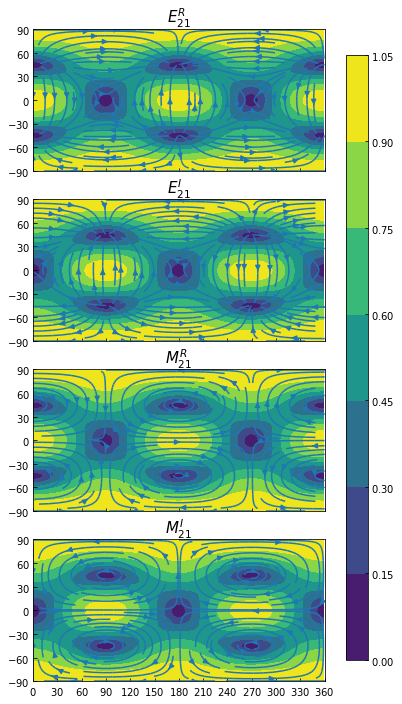

In [112]:
E21R, E21I, M21R, M21I = 1, 1, 1, 1

# E_{21}^R
drac1 = E21R * sin(ra_rad) * sin(dec_rad)
ddec1 = -E21R * cos(ra_rad) * cos(2*dec_rad)
dra1 = drac1 / fac
dpos1 = np.sqrt(drac1*drac1 + ddec1*ddec1)

# E_{21}^I
drac2 = E21I * cos(ra_rad) * sin(dec_rad)
ddec2 = E21I * sin(ra_rad) * cos(2*dec_rad) 
dra2 = drac2 / fac
dpos2 = np.sqrt(drac2*drac2 + ddec2*ddec2)

# M_{21}^R
drac3 = -M21R * cos(ra_rad) * cos(2*dec_rad)
ddec3 = -M21R * sin(ra_rad) * sin(dec_rad)
dra3 = drac3 / fac
dpos3 = np.sqrt(drac3*drac3 + ddec3*ddec3)

# M_{21}^I
drac4 = M21I * sin(ra_rad) * cos(2*dec_rad) 
ddec4 = -M21I * cos(ra_rad) * sin(dec_rad)
dra4 = drac4 / fac
dpos4 = np.sqrt(drac4*drac4 + ddec4*ddec4)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(6, 12), nrows=4, 
                                    sharex=True, sharey=True)

ax0.streamplot(ra_deg, dec_deg, dra1, ddec1)
ax1.streamplot(ra_deg, dec_deg, dra2, ddec2)
ax2.streamplot(ra_deg, dec_deg, dra3, ddec3)
ax3.streamplot(ra_deg, dec_deg, dra4, ddec4)

cs0 = ax0.contourf(ra_deg1, dec_deg1, dpos1, vmin=0, vmax=1)
cs1 = ax1.contourf(ra_deg1, dec_deg1, dpos2, vmin=0, vmax=1)
cs2 = ax2.contourf(ra_deg1, dec_deg1, dpos3, vmin=0, vmax=1)
cs3 = ax3.contourf(ra_deg1, dec_deg1, dpos4, vmin=0, vmax=1)

ax0.axis([0, 360, -90, 90])
ax0.set_xticks(np.arange(0, 361, 30))
ax0.set_yticks(np.arange(-90, 91, 30))

ax0.set_title("$E_{21}^R$", fontsize=15)
ax1.set_title("$E_{21}^I$", fontsize=15)
ax2.set_title("$M_{21}^R$", fontsize=15)
ax3.set_title("$M_{21}^I$", fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs0, cax=cbar_ax)

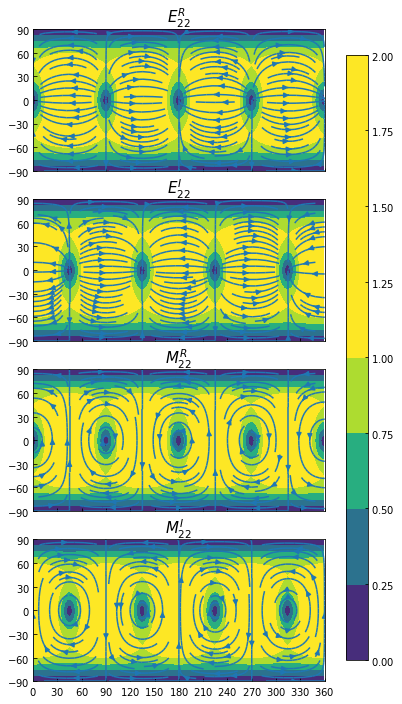

In [113]:
E22R, E22I, M22R, M22I = 1, 1, 1, 1

# E_{22}^R
drac1 = -2 * E22R * sin(2*ra_rad) * cos(dec_rad)
ddec1 = -E22R * cos(2*ra_rad) * sin(2*dec_rad)
dra1 = drac1 / fac
dpos1 = np.sqrt(drac1*drac1 + ddec1*ddec1)

# E_{22}^I
drac2 = -2 * E22I * cos(2*ra_rad) * cos(dec_rad)
ddec2 = E22I * sin(2*ra_rad) * sin(2*dec_rad) 
dra2 = drac2 / fac
dpos2 = np.sqrt(drac2*drac2 + ddec2*ddec2)

# M_{22}^R
drac3 = -M22R * cos(2*ra_rad) * sin(2*dec_rad)
ddec3 = 2 * M22R * sin(2*ra_rad) * cos(dec_rad)
dra3 = drac3 / fac
dpos3 = np.sqrt(drac3*drac3 + ddec3*ddec3)

# M_{22}^I
drac4 = M22I * sin(2*ra_rad) * sin(2*dec_rad) 
ddec4 = 2 * E22I * cos(2*ra_rad) * cos(dec_rad)
dra4 = drac4 / fac
dpos4 = np.sqrt(drac4*drac4 + ddec4*ddec4)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(6, 12), nrows=4, 
                                    sharex=True, sharey=True)

ax0.streamplot(ra_deg, dec_deg, dra1, ddec1)
ax1.streamplot(ra_deg, dec_deg, dra2, ddec2)
ax2.streamplot(ra_deg, dec_deg, dra3, ddec3)
ax3.streamplot(ra_deg, dec_deg, dra4, ddec4)

cs0 = ax0.contourf(ra_deg1, dec_deg1, dpos1, vmin=0, vmax=1)
cs1 = ax1.contourf(ra_deg1, dec_deg1, dpos2, vmin=0, vmax=1)
cs2 = ax2.contourf(ra_deg1, dec_deg1, dpos3, vmin=0, vmax=1)
cs3 = ax3.contourf(ra_deg1, dec_deg1, dpos4, vmin=0, vmax=1)

ax0.axis([0, 360, -90, 90])
ax0.set_xticks(np.arange(0, 361, 30))
ax0.set_yticks(np.arange(-90, 91, 30))

ax0.set_title("$E_{22}^R$", fontsize=15)
ax1.set_title("$E_{22}^I$", fontsize=15)
ax2.set_title("$M_{22}^R$", fontsize=15)
ax3.set_title("$M_{22}^I$", fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs0, cax=cbar_ax)